In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as ml
# to show the figures in the jupyter notebook itself
%matplotlib inline 

train = pd.read_csv('train_bikes.csv', parse_dates=['datetime']) # loading the training dat

print(train)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
5     2011-01-01 05:00:00       1        0           0        2   9.84   
6     2011-01-01 06:00:00       1        0           0        1   9.02   
7     2011-01-01 07:00:00       1        0           0        1   8.20   
8     2011-01-01 08:00:00       1        0           0        1   9.84   
9     2011-01-01 09:00:00       1        0           0        1  13.12   
10    2011-01-01 10:00:00       1        0           0        1  15.58   
11    2011-01-01 11:00:00       1        0           0        1  14.76   
12    2011-01-01 12:00:00       1     

In [3]:
train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


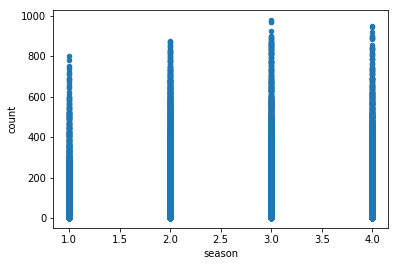

In [4]:
train.tail() # looking at the training data from end
train.plot.scatter(x = 'season', y = 'count') # plotting the counts based on the season

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


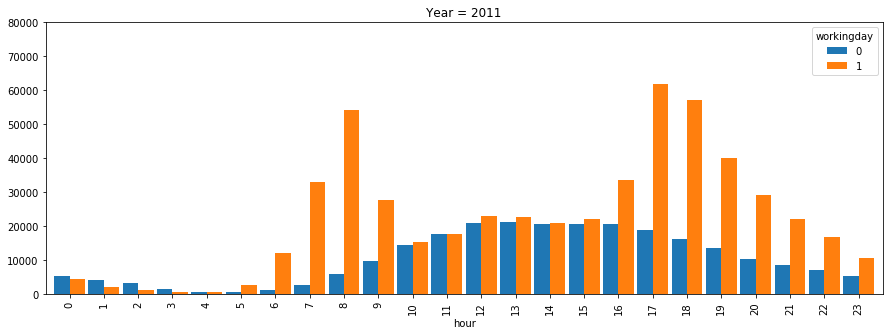

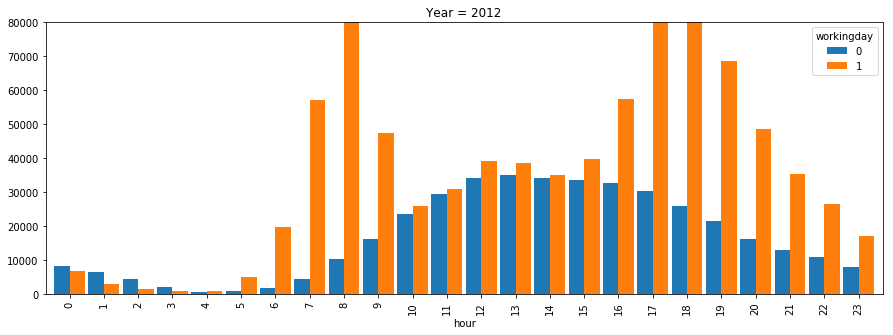

In [7]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour
plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

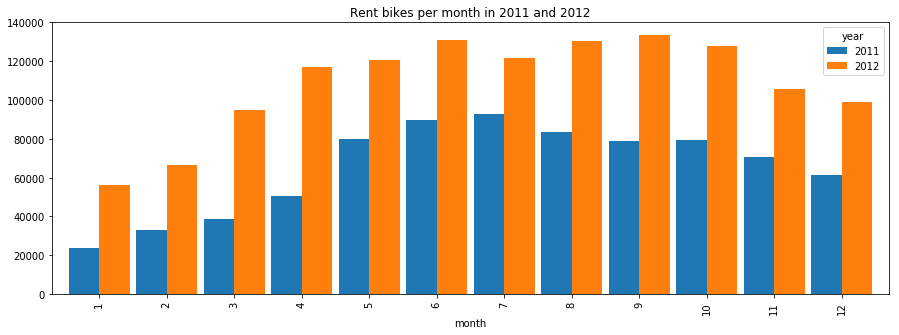

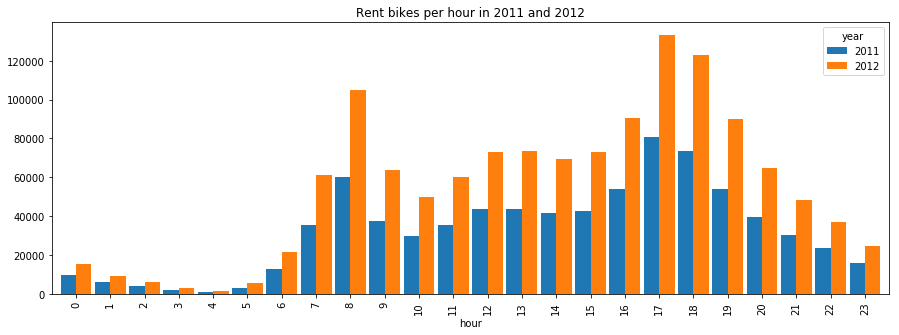

In [8]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = train.copy()
    dd['year'] = train.datetime.dt.year # extratcing the year
    dd['month'] = train.datetime.dt.month # extratcing the month
    dd['hour'] = train.datetime.dt.hour # extratcing the hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year

In [10]:
use_cols=['Date','Close']
data2=pd.read_csv("train_bikes.csv",usecols=use_cols)

data2['date']= pd.to_datetime(data2.Date)

data2['Year']=data2.date.dt.year
data2['Month']=data2.date.dt.month
data2['Day']=data2.date.dt.day

data=data2.drop(['Date', 'date'], axis = 1) 

ValueError: Usecols do not match columns, columns expected but not found: ['Date', 'Close']